## 01 - Access data cubes in object storage
### A DeepESDL example notebook 

This concise notebook demonstrates how xcubes data stores provide convenient access to the published data cubes, generated by the Cube Gen team and persisted on object storage. The recipes used in the generation process are publicly available at in the [Cube Gen repository](https://github.com/deepesdl/cube-gen). 

Please, also refer to the [DeepESDL documentation](https://deepesdl.readthedocs.io/en/latest/guide/user-guide/) and visit the platform's [website](https://www.earthsystemdatalab.net/) for further information!

Brockmann Consult, 2022

-----------------

In [1]:
import xcube

In [2]:
xcube.__version__

'0.12.1'

In [3]:
from xcube.core.store import new_data_store
store = new_data_store("s3", root="deep-esdl-public", storage_options=dict(anon=True))
list(store.get_data_ids())

/home/conda/deepesdl/ad58651ccd12e6a3203ef6d4686862efd6d8b7377046c8ac02f87b8a2f5b9546-20221011-090031-467021-16-cube-gen/lib/python3.9/site-packages/xcube/util/plugin.py:130: UserWarning: initializing xcube plugin 'xcube' took 107 ms, consider code optimization!
  warnings.warn(f'initializing xcube plugin {entry_point.name!r} took {millis} ms, '


['black-sea-1x1024x1024.levels',
 'black-sea-1x1024x1024.zarr',
 'black-sea-256x128x128.zarr',
 'esdc-8d-0.25deg-1x720x1440-3.0.1.zarr',
 'esdc-8d-0.25deg-256x128x128-3.0.1.zarr']

In [4]:
bs_cube = store.open_data('black-sea-1x1024x1024.zarr')

In [5]:
bs_cube

,Array,Chunk
Bytes,43.57 GiB,4.00 MiB
Shape,"(731, 3000, 5333)","(1, 1024, 1024)"
Count,2 Graph Layers,13158 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,43.57 GiB,4.00 MiB
Shape,"(731, 3000, 5333)","(1, 1024, 1024)"
Count,2 Graph Layers,13158 Chunks
Type,float32,numpy.ndarray
,Array,Chunk


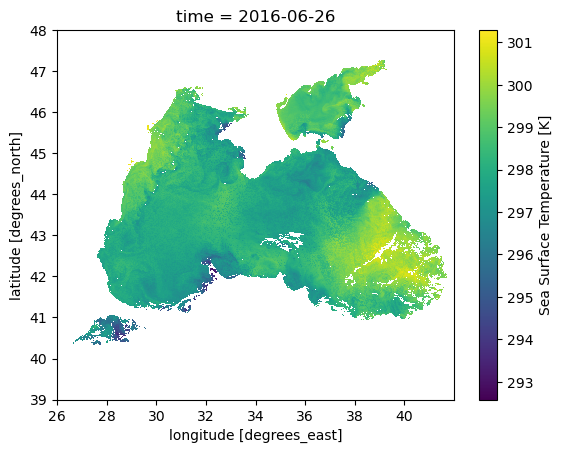

In [6]:
bs_cube.sst.isel(time=177).plot()